# Part of Speech tagging with NLU 

## Install Java and NLU

In [ ]:
import os
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install nlu  > /dev/null   
import nlu

Part of speech tags assign each token one of the following grammatical labels 
  



|Tag |Description | Example|
|------|------------|------|
|CC| Coordinating conjunction | This batch of mushroom stew is savory **and** delicious    |
|CD| Cardinal number | Here are **five** coins    |
|DT| Determiner | **The** bunny went home    |
|EX| Existential there | **There** is a storm coming    |
|FW| Foreign word | I'm having a **déjà vu**    |
|IN| Preposition or subordinating conjunction | He is cleverer **than** I am   |
|JJ| Adjective | She wore a **beautiful** dress    |
|JJR| Adjective, comparative | My house is **bigger** than yours    |
|JJS| Adjective, superlative | I am the **shortest** person in my family   |
|LS| List item marker | A number of things need to be considered before starting a business **,** such as premises **,** finance **,** product demand **,** staffing and access to customers |
|MD| Modal | You **must** stop when the traffic lights turn red    |
|NN| Noun, singular or mass | The **dog** likes to run    |
|NNS| Noun, plural | The **cars** are fast    |
|NNP| Proper noun, singular | I ordered the chair from **Amazon**  |
|NNPS| Proper noun, plural | We visted the **Kennedys**   |
|PDT| Predeterminer | **Both** the children had a toy   |
|POS| Possessive ending | I built the dog'**s** house    |
|PRP| Personal pronoun | **You** need to stop    |
|PRP$| Possessive pronoun | Remember not to judge a book by **its** cover |
|RB| Adverb | The dog barks **loudly**    |
|RBR| Adverb, comparative | Could you sing more **quietly** please?   |
|RBS| Adverb, superlative | Everyone in the race ran fast, but John ran **the fastest** of all    |
|RP| Particle | He ate **up** all his dinner    |
|SYM| Symbol | What are you doing **?**    |
|TO| to | Please send it back **to** me    |
|UH| Interjection | **Wow!** You look gorgeous    |
|VB| Verb, base form | We **play** soccer |
|VBD| Verb, past tense | I **worked** at a restaurant    |
|VBG| Verb, gerund or present participle | **Smoking** kills people   |
|VBN| Verb, past participle | She has **done** her homework    |
|VBP| Verb, non-3rd person singular present | You **flit** from place to place    |
|VBZ| Verb, 3rd person singular present | He never **calls** me    |
|WDT| Wh-determiner | The store honored the complaints, **which** were less than 25 days old    |
|WP| Wh-pronoun | **Who** can help me?    |
|WP\$| Possessive wh-pronoun | **Whose** fault is it?    |
|WRB| Wh-adverb | **Where** are you going?  |





# NLU makes POS easy. 

You just need to load the POS model via ner.load() and predict on some dataset.    
It could be a pandas dataframe with a column named text or just an array of strings.

In [ ]:
import nlu 

example_text =  ["A person like Jim or Joe", 
 "An organisation like Microsoft or PETA",
 "A location like Germany",
 "Anything else like Playstation", 
 "Person consisting of multiple tokens like Angela Merkel or Donald Trump",
 "Organisations consisting of multiple tokens like JP Morgan",
 "Locations consiting of multiple tokens like Los Angeles", 
 "Anything else made up of multiple tokens like Super Nintendo",]

nlu.load('pos').predict(example_text)[['pos','token']]

pos_anc download started this may take some time.
Approximate size to download 4.3 MB
[OK!]


,pos,token
origin_index,,
0,DT,A
0,NN,person
0,IN,like
0,NNP,Jim
0,CC,or
0,NNP,Joe
1,DT,An
1,NN,organisation
1,IN,like


In [ ]:
text = ["Barclays misled shareholders and the public about one of the biggest investments in the bank's history, a BBC Panorama investigation has found.",
"The bank announced in 2008 that Manchester City owner Sheikh Mansour had agreed to invest more than £3bn.",
"But the BBC found that the money, which helped Barclays avoid a bailout by British taxpayers, actually came from the Abu Dhabi government.",
"Barclays said the mistake in its accounts was 'a drafting error'.",
"Unlike RBS and Lloyds TSB, Barclays narrowly avoided having to request a government bailout late in 2008 after it was rescued by £7bn worth of new investment, most of which came from the Gulf states of Qatar and Abu Dhabi.",
"The S&P 500's price to earnings multiple is 71% higher than Apple's, and if Apple were simply valued at the same multiple, its share price would be $840, which is 52% higher than its current price.",
"Alice has a cat named Alice and also a dog named Alice and also a parrot named Alice, it is her favorite name!"
] + example_text
pos_df = nlu.load('pos').predict(text)[['pos','token']]

pos_anc download started this may take some time.
Approximate size to download 4.3 MB
[OK!]


## Lets explore our data which the predicted POS tags and visalize them!    

We specify [1:] so we dont se the count for the O-tag wich is the most common, since most words in a sentence are not named entities and thus not part of a chunk

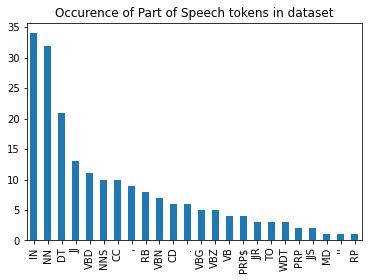

In [ ]:

pos_df['pos'].value_counts()[1:].plot.bar(title='Occurence of Part of Speech tokens in dataset')

## We can merge the I-XXX and B-XXX tags for tokens with the same XXX tag for better insight   

Let's define a dict to rename I-XXX and B-XXX to XXX.    
We can use the pandas [Dataframe.replace()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) function with a dict to add a column which has only the tag ORG, PER, LOC, MISC or O in it.



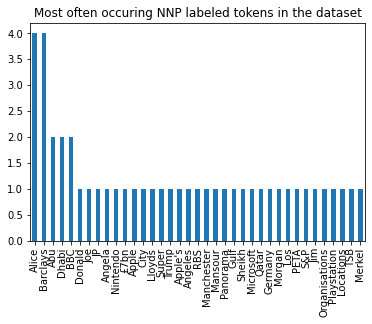

In [ ]:
pos_type_to_viz = 'NNP'
pos_df[pos_df.pos == pos_type_to_viz]['token'].value_counts().plot.bar(title='Most often occuring NNP labeled tokens in the dataset')

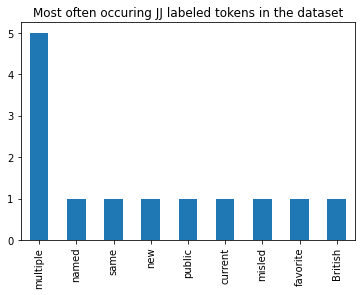

In [ ]:
pos_type_to_viz = 'JJ'
pos_df[pos_df.pos == pos_type_to_viz]['token'].value_counts().plot.bar(title='Most often occuring JJ labeled tokens in the dataset')

# NLU provides many more POS models!

In [ ]:
nlu.print_all_model_kinds_for_action('pos')

For language <nl> NLU provides the following Models : 
nlu.load('nl.pos') returns Spark NLP model pos_ud_alpino
nlu.load('nl.pos.ud_alpino') returns Spark NLP model pos_ud_alpino
For language <en> NLU provides the following Models : 
nlu.load('en.pos') returns Spark NLP model pos_anc
nlu.load('en.pos.anc') returns Spark NLP model pos_anc
nlu.load('en.pos.ud_ewt') returns Spark NLP model pos_ud_ewt
For language <fr> NLU provides the following Models : 
nlu.load('fr.pos') returns Spark NLP model pos_ud_gsd
nlu.load('fr.pos.ud_gsd') returns Spark NLP model pos_ud_gsd
For language <de> NLU provides the following Models : 
nlu.load('de.pos.ud_hdt') returns Spark NLP model pos_ud_hdt
nlu.load('de.pos') returns Spark NLP model pos_ud_hdt
For language <it> NLU provides the following Models : 
nlu.load('it.pos') returns Spark NLP model pos_ud_isdt
nlu.load('it.pos.ud_isdt') returns Spark NLP model pos_ud_isdt
For language <nb> NLU provides the following Models : 
nlu.load('nb.pos.ud_bokmaal') r